In [102]:
import numpy as np 
import pandas as pd
import glob, os, json
import seaborn as sns
import json
import matplotlib.pyplot as plt
%matplotlib inline

#### 1.1 Merging all json files in one dataframe then display information about the structure of the df. We see which columns it contains, how many records have a non-empty value for each column and its data type (object usually corresponds to string) and a representation of the dataset

In [116]:
json_dir = 'C:/Users/Katerina/anaconda3/envs/tweets'

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
 with open(file) as f:
    json_data = pd.json_normalize(json.loads(f.read()))
    json_data['site'] = file.rsplit("/", 1)[-1]
    dfs.append(json_data)
df = pd.concat(dfs)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271342 entries, 0 to 27220
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   full_text           271331 non-null  object 
 1   text_translation    271328 non-null  object 
 2   created_at          271334 non-null  object 
 3   screen_name         271333 non-null  object 
 4   description         223646 non-null  object 
 5   desc_translation    223621 non-null  object 
 6   weekofyear          271328 non-null  float64
 7   weekday             271322 non-null  float64
 8   day                 271328 non-null  float64
 9   month               271322 non-null  float64
 10  year                271322 non-null  float64
 11  location            151361 non-null  object 
 12  point_info          134445 non-null  object 
 13  point               134445 non-null  object 
 14  latitude            134445 non-null  float64
 15  longitude           134445 non-null

In [118]:
pd.set_option('display.max_columns', 24)
pd.set_option('display.max_rows', 100)
df

,full_text,text_translation,created_at,screen_name,description,desc_translation,weekofyear,weekday,day,month,year,location,point_info,point,latitude,longitude,altitude,province,hisco_standard,hisco_code,industry,sentiment_pattern,subjective_pattern,site
0,"@pflegearzt @Friedelkorn @LAguja44 Pardon, wol...",@pflegearzt @Friedelkorn @ LAguja44 Pardon wol...,1583756789000,TheoRettich,"I ❤️science, therefore a Commie. ☭ FALGSC: P...","I ❤️science, Therefore a Commie. ☭ FALGSC: Par...",11.0,0.0,9.0,3.0,2020.0,Netherlands,Nederland,"(52.5001698, 5.7480821, 0.0)",52.500170,5.748082,0.0,Flevoland,None,None,False,0.000000,0.000000,tweets\dutch_tweets_chunk0.json
1,RT @grantshapps: Aviation demand is reduced du...,RT @grantshapps: Aviation demand is reduced du...,1583756794000,davidiwanow,I tweet a lot but love to engage & converse. P...,I tweet a lot but love to engage and converse....,11.0,0.0,9.0,3.0,2020.0,"Amsterdam, The Netherlands","Amsterdam, Noord-Holland, Nederland","(52.3727598, 4.8936041, 0.0)",52.372760,4.893604,0.0,Noord-Holland,None,None,False,0.000000,0.000000,tweets\dutch_tweets_chunk0.json
2,RT @DDStandaard: De droom van D66 wordt werkel...,RT @DDStandaard: The D66 dream come true: COVI...,1583756797000,EricL65,None,None,11.0,0.0,9.0,3.0,2020.0,None,None,None,NaN,NaN,0.0,False,None,None,False,0.000000,0.000000,tweets\dutch_tweets_chunk0.json
3,RT @DDStandaard: De droom van D66 wordt werkel...,RT @DDStandaard: The D66 dream come true: COVI...,1583756797000,EricL65,None,None,11.0,0.0,9.0,3.0,2020.0,None,None,None,NaN,NaN,0.0,False,None,None,False,0.000000,0.000000,tweets\dutch_tweets_chunk0.json
4,De droom van D66 wordt werkelijkheid: COVID-19...,The D66 dream becomes reality: COVID-19 super ...,1583756807000,EhrErwin,Budget-Life Coach. Time management Coaching. b...,Budget-Life Coach. Time management coaching. h...,11.0,0.0,9.0,3.0,2020.0,Amsterdam,"Amsterdam, Noord-Holland, Nederland","(52.3727598, 4.8936041, 0.0)",52.372760,4.893604,0.0,Noord-Holland,None,None,False,0.000000,0.000000,tweets\dutch_tweets_chunk0.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27216,RT @GuityMohebbi: Medeverantwoordelijk en voll...,RT @GuityMohebbi: Jointly responsible and full...,1599762803000,laAckxtra,"While we were sleeping you fought, @laAckxtra ...","While we were sleeping you fought, @laAckxtra ...",37.0,3.0,10.0,9.0,2020.0,None,None,None,NaN,NaN,0.0,False,None,None,False,0.233333,0.606667,tweets\dutch_tweets_chunk9.json
27217,RT @GuityMohebbi: Medeverantwoordelijk en voll...,RT @GuityMohebbi: Jointly responsible and full...,1599762803000,laAckxtra,"While we were sleeping you fought, @laAckxtra ...","While we were sleeping you fought, @laAckxtra ...",37.0,3.0,10.0,9.0,2020.0,None,None,None,NaN,NaN,0.0,False,None,None,False,0.233333,0.606667,tweets\dutch_tweets_chunk9.json
27218,RT @ntvkenya: Covid? What Covid? Scam?\n\nPres...,RT @ntvkenya: Covid? What Covid? Scam?\n\nPres...,1599762814000,Leahs_Daughter,THE BEE’s KNEES! 🇰🇪,The Bee's Knees! 🇰🇪,37.0,3.0,10.0,9.0,2020.0,"The Hague, The Netherlands","Den Haag, Zuid-Holland, Nederland","(52.0799838, 4.3113461, 0.0)",52.079984,4.311346,0.0,Zuid-Holland,resident,20210,True,0.000000,0.000000,tweets\dutch_tweets_chunk9.json
27219,@mauricedehond @covid Volgens mij krijgt Mauri...,@mauricedehond @covid gets to me Maurice pay p...,1599762824000,BruggeXander,"Wielerfanaat, Andersdenker, Kritisch\n\nCorona...","Cycling enthusiast, Anders Thinker, Critical\n...",37.0,3.0,10.0,9.0,2020.0,None,None,None,NaN,NaN,0.0,False,None,None,False,0.018750,0.568750,tweets\dutch_tweets_chunk9.json


#### 1.2 Below are listed:
1. the most active months of the year
2. most active days of the week
3. most active weeks of the year
4. some visualisations

all in descending order (from largest value to smallest), count = number of occurrences in the dataset,
percent = percentage of occurances in the tota dataset

In [107]:
responders_month = df['month'].value_counts()
responders_month_per = df['month'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
month_df = pd.concat([responders_month, responders_month_per], axis='columns', sort=False)
month_df.columns = ['Count','Percent']
month_df

,Count,Percent
9.0,59936,22.1%
8.0,56626,20.9%
6.0,50811,18.7%
2.0,26738,9.9%
3.0,23151,8.5%
7.0,19098,7.0%
4.0,17692,6.5%
5.0,12944,4.8%
1.0,4324,1.6%
2020.0,2,0.0%


<AxesSubplot:>

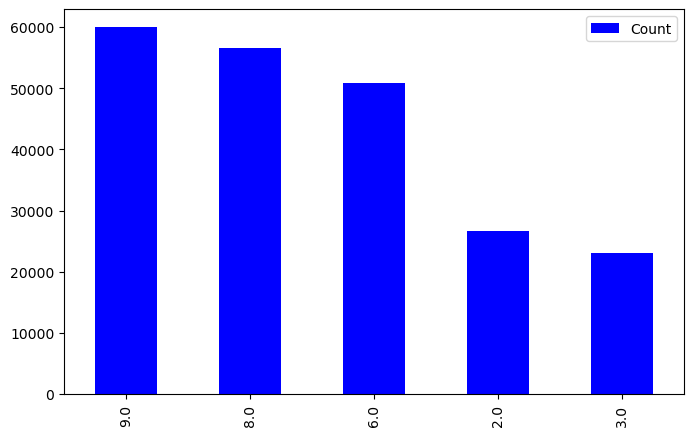

In [108]:
month_df.head(n=5).plot(y = "Count", kind="bar", figsize=(8,5), color="blue")

In [148]:
responders_day = df['weekday'].value_counts()
responders_day_per = df['weekday'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
day_df = pd.concat([responders_day, responders_day_per], axis='columns', sort=False)
day_df.columns = ['Count','Percent']
day_df # the most popular days of the week Monday=0….Sunday = 6

,Count,Percent
2.0,46125,17.0%
0.0,45737,16.9%
3.0,45406,16.7%
1.0,37113,13.7%
4.0,36000,13.3%
5.0,30697,11.3%
6.0,30244,11.1%


In [111]:
responders_week = df['weekofyear'].value_counts()
responders_week_per = df['weekofyear'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
week_df = pd.concat([responders_week, responders_week_per], axis='columns', sort=False)
week_df.columns = ['Count','Percent']
week_df

,Count,Percent
36.0,24708,9.1%
25.0,19698,7.3%
34.0,16924,6.2%
26.0,16614,6.1%
38.0,15655,5.8%
35.0,13632,5.0%
37.0,12883,4.7%
32.0,12300,4.5%
39.0,10846,4.0%
9.0,8500,3.1%


C:\Users\Katerina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Count', ylabel='Density'>

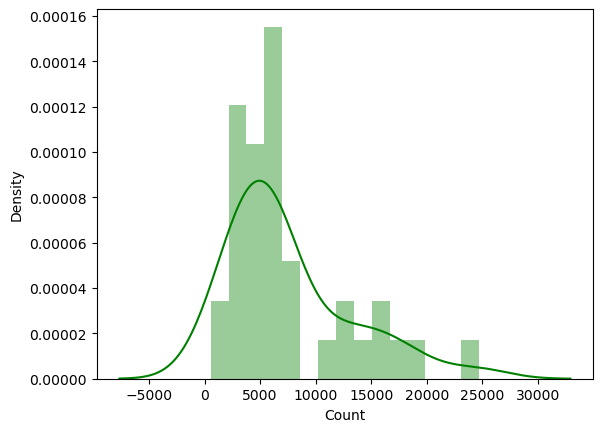

In [172]:
sns.distplot(week_df['Count'], bins=15, color='green') 
#week distribution curve

<function matplotlib.pyplot.show(close=None, block=None)>

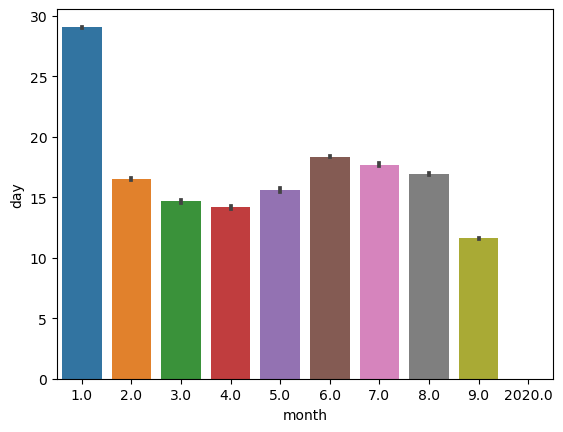

In [113]:
xaxis = df['month']
yaxis = df['day']
res = sns.barplot(x=xaxis,y=yaxis)
plt.show 
# barplot = trend estimation diagram (x axis: category y axis: numerical value. ) 
# Black bars are the degree of uncertainty around the estimate

#### 1.3 Top 10 users based on tweets, covid references, province, industry reference

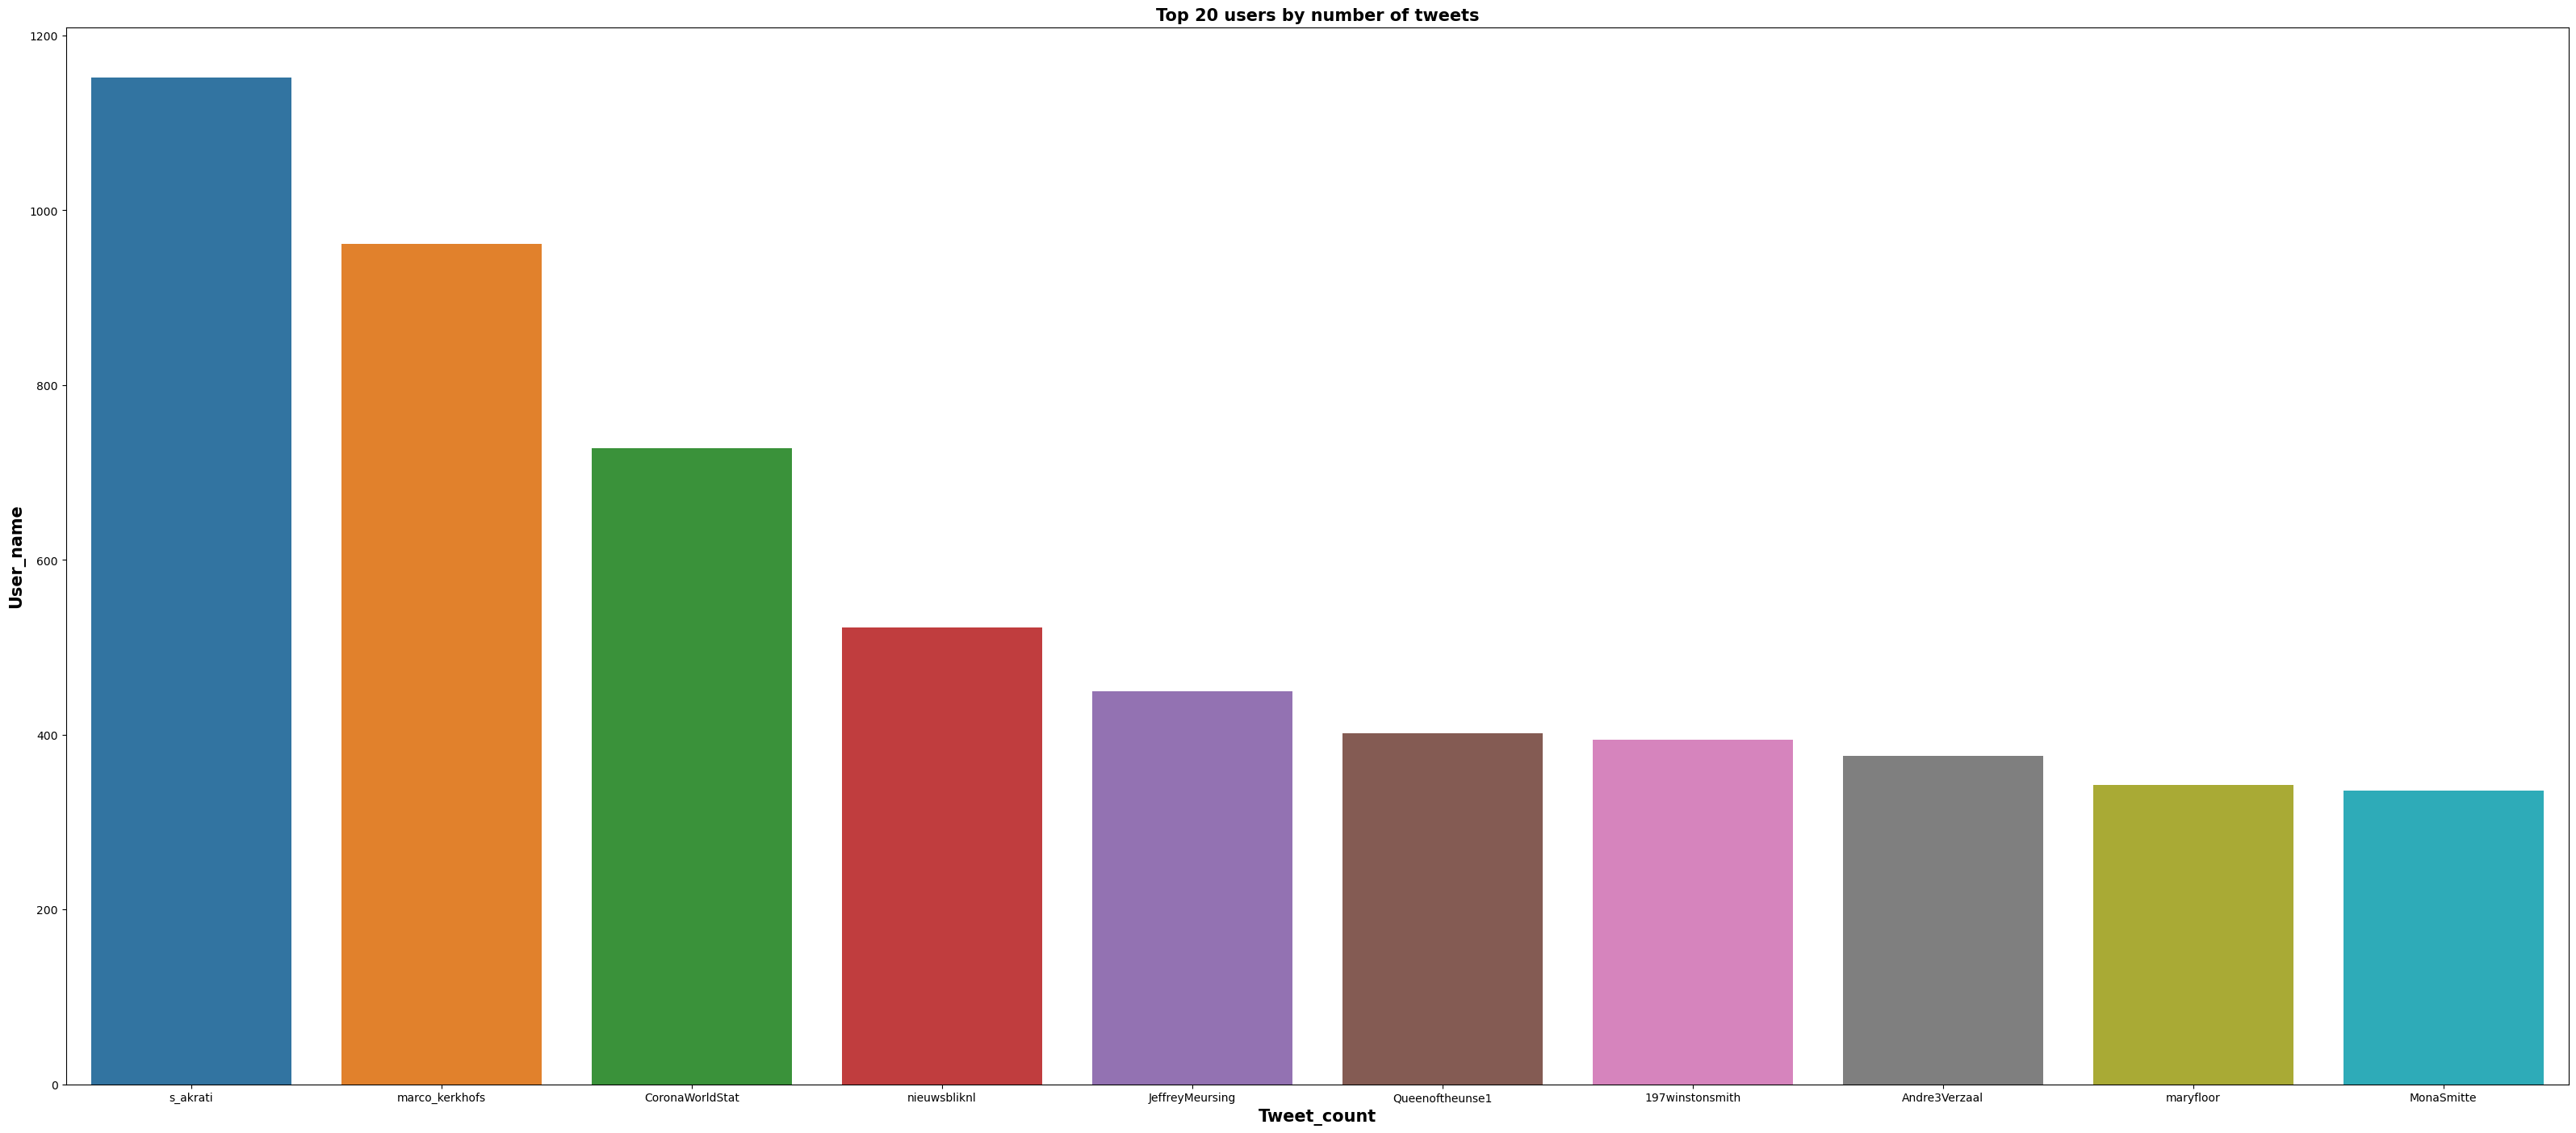

In [143]:
tweets_screenname_count = df['screen_name'].value_counts().reset_index()
plt.figure(figsize=(40,17))
sns.barplot(x='index', y='screen_name', data= tweets_screenname_count.head(10))
plt.title('Top 20 users by number of tweets', weight='bold', size=15)
plt.ylabel('User_name', size=15, weight='bold')
plt.xlabel('Tweet_count', size=15, weight='bold')
plt.show() #top 10 'tweeters' 
#from https://www.kaggle.com/code/iqraddfkldf/duch-social-media-tweets-analysis

In [135]:
covid = df['text_translation'].str.contains('covid', case = False).sum()
covid #number of tweets containing the word covid

38843

In [138]:
responders_province = df['province'].value_counts()
responders_province_per = df['province'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
province_df = pd.concat([responders_province, responders_province_per], axis='columns', sort=False)
province_df.columns = ['Count','Percent']
province_df # the province of responders (count & percentage)

,Count,Percent
False,161110,60.1%
Noord-Holland,33959,12.7%
Flevoland,31424,11.7%
Zuid-Holland,15254,5.7%
Utrecht,5628,2.1%
Noord-Brabant,4928,1.8%
Gelderland,4724,1.8%
Overijssel,2879,1.1%
Groningen,2343,0.9%
Limburg,1990,0.7%


In [150]:
responders_industry = df['industry'].value_counts()
responders_industry_per = df['industry'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
industry_df = pd.concat([responders_industry, responders_industry_per], axis='columns', sort=False)
industry_df.columns = ['Count','Percent']
industry_df #whether the tweets talks about indusrty

,Count,Percent
False,201860,74.4%
True,69482,25.6%


## Sentiment Score - Categorising - Same can be done for Subjectivity Score

C:\Users\Katerina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='sentiment_pattern', ylabel='Density'>

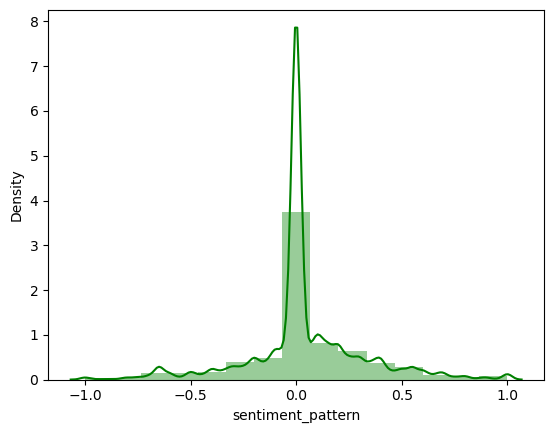

In [199]:
sns.distplot(df['sentiment_pattern'], bins=15, color='green')

In [200]:
#categorising sentiment score
df.loc[df['sentiment_pattern']<= -0.5, 'sent_group'] = 'very negative'
df.loc[df['sentiment_pattern'].between(-0.501,-0.0001), 'sent_group'] = 'negative'
df.loc[df['sentiment_pattern']==0, 'sent_group']='neutral'
df.loc[df['sentiment_pattern'].between(0.01,0.5), 'sent_group'] = 'positive'
df.loc[df['sentiment_pattern']>0.51, 'sent_group'] = 'very_positive'

responders_sent = df['sent_group'].value_counts()
responders_sent_per = df['sent_group'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
sent_df = pd.concat([responders_sent, responders_sent_per], axis='columns', sort=False)
sent_df.columns = ['Count','Percent']
sent_df

#sentiment score grouping 

,Count,Percent
neutral,116973,43.3%
positive,77244,28.6%
negative,50004,18.5%
very_positive,15584,5.8%
very negative,10641,3.9%


<AxesSubplot:ylabel='Count'>

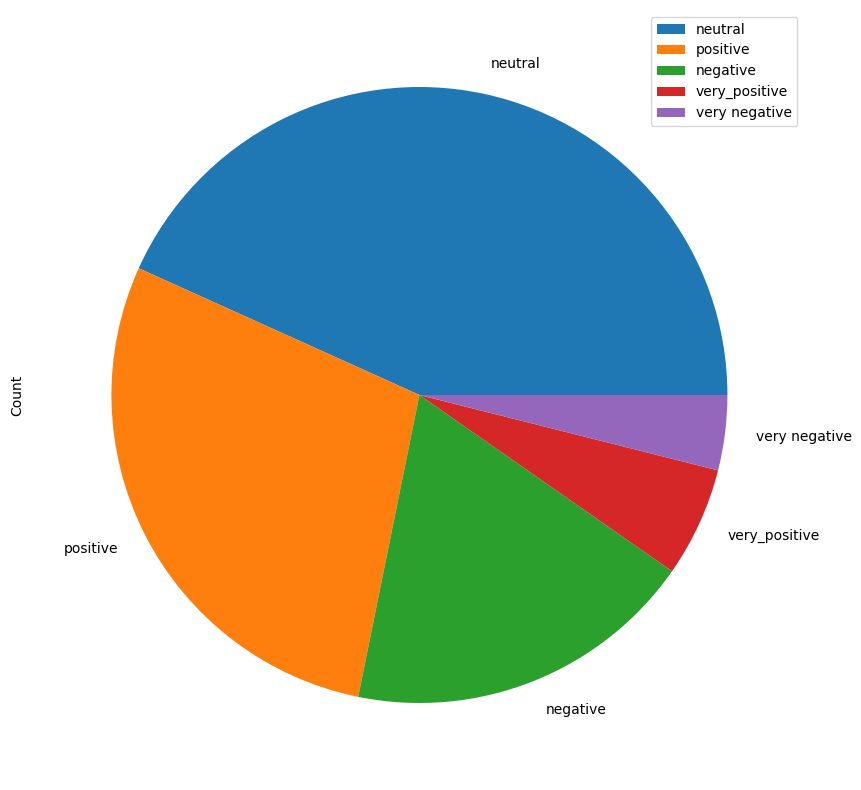

In [177]:
sent_df.plot.pie(y='Count', figsize=(10, 10))

In [198]:
province_grp = df.groupby(['province'])
sent_grp = province_grp['sent_group'].value_counts()
sent = pd.concat([sent_grp], axis='columns', sort=False)

sent_per = province_grp['sent_group'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
sent_df_per= pd.concat([sent,sent_per], axis='columns', sort=False)

sent_df_per.columns=['Count', 'Percent']
sent_df_per #sentiment pattern grouping  for each  province

Count Percent
province            sent_group                  
False               neutral        59496   37.1%
                    positive       50684   31.6%
                    negative       33245   20.7%
                    very_positive   9743    6.1%
                    very negative   7328    4.6%
Drenthe             positive         463   34.1%
                    neutral          460   33.8%
                    negative         283   20.8%
                    very_positive     91    6.7%
                    very negative     62    4.6%
Flevoland           neutral        17704   56.4%
                    positive        6855   21.9%
                    negative        4372   13.9%
                    very_positive   1553    5.0%
                    very negative    885    2.8%
Friesland (Fryslân) neutral          708   37.1%
                    positive         602   31.6%
                    negative         392   20.6%
                    very_positive    116    6.1%
                    very negative     88    4.6%
Gelderland          neutral         1778   37.7%
                    positive        1510   32.0%
                    negative         935   19.8%
                    very_positive    299    6.3%
                    very negative    191    4.1%
Groningen           neutral          925   39.6%
                    positive         687   29.4%
                    negative         476   20.4%
                    very_positive    147    6.3%
                    very negative    100    4.3%
Limburg             neutral          978   49.3%
                    positive         505   25.5%
                    negative         329   16.6%
                    very_positive    109    5.5%
                    very negative     61    3.1%
Noord-Brabant       neutral         2044   41.6%
                    positive        1454   29.6%
                    negative         960   19.5%
                    very_positive    283    5.8%
                    very negative    170    3.5%
Noord-Holland       neutral        20650   60.9%
                    positive        6577   19.4%
                    negative        4241   12.5%
                    very_positive   1621    4.8%
                    very negative    804    2.4%
Overijssel          neutral         1052   36.8%
                    positive         967   33.8%
                    negative         536   18.7%
                    very_positive    181    6.3%
                    very negative    123    4.3%
Utrecht             neutral         2285   40.8%
                    positive        1745   31.1%
                    negative         985   17.6%
                    very_positive    381    6.8%
                    very negative    207    3.7%
Zeeland             neutral          275   38.3%
                    positive         240   33.4%
                    negative         142   19.8%
                    very_positive     38    5.3%
                    very negative     23    3.2%
Zuid-Holland        neutral         7203   47.4%
                    positive        4129   27.2%
                    negative        2584   17.0%
                    very_positive    818    5.4%
                    very negative    472    3.1%

In [211]:
industry_grp = df.groupby(['industry'])

ind_grp = industry_grp['sent_group'].value_counts()
ind = pd.concat([ind_grp], axis='columns', sort=False)

ind_per = industry_grp['sent_group'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
ind_df_per= pd.concat([ind,ind_per], axis='columns', sort=False)

ind_df_per.columns=['Count', 'Percent']
ind_df_per

Count Percent
industry sent_group                  
False    neutral        92475   46.0%
         positive       54470   27.1%
         negative       34733   17.3%
         very_positive  11772    5.9%
         very negative   7760    3.9%
True     neutral        24498   35.4%
         positive       22774   32.9%
         negative       15271   22.1%
         very_positive   3812    5.5%
         very negative   2881    4.2%

In [215]:
hisco = df['hisco_standard'].value_counts()
hisco_per = df['hisco_standard'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
hisco_df = pd.concat([hisco, hisco_per], axis='columns', sort=False)
hisco_df.columns = ['Count','Percent']
hisco_df.head(15)#top 15 hisco standar key words count & percent

,Count,Percent
min,9427,13.6%
graaf,2756,4.0%
arts,1926,2.8%
"min, minister",1925,2.8%
meter,1847,2.7%
ober,1751,2.5%
waard,1745,2.5%
"patiënte, patiënt",1607,2.3%
ijker,1144,1.6%
expert,1132,1.6%
